# Clustering of timeseries data

In [2]:
!pip install tslearn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 369.8/369.8 kB 4.6 MB/s eta 0:00:00


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans
import pandas as pd


# Load the dataset
df = pd.read_csv('/content/baggagecomplaints(time series).csv')  # Replace with your file path

# Display the first few rows to understand the column names
print(df.head())


          Airline     Date  Month  Year  Baggage  Scheduled  Cancelled  \
0  American Eagle  01/2004      1  2004    12502      38276       2481   
1  American Eagle  02/2004      2  2004     8977      35762        886   
2  American Eagle  03/2004      3  2004    10289      39445       1346   
3  American Eagle  04/2004      4  2004     8095      38982        755   
4  American Eagle  05/2004      5  2004    10618      40422       2206   

   Enplaned  
0    992360  
1   1060618  
2   1227469  
3   1234451  
4   1267581  


In [10]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

# Assuming 'Baggage' is the column with the time series data
# You need to ensure the data is in the correct shape for tslearn
time_series = df['Baggage'].values.reshape((df.shape[0], -1))

# Normalize the time series data
scaler = TimeSeriesScalerMeanVariance()
time_series_scaled = scaler.fit_transform(time_series)

# Cluster the time series
n_clusters = 3  # The number of clusters to form
model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw")
labels = model.fit_predict(time_series_scaled)

# Now 'labels' contains the cluster label for each time series


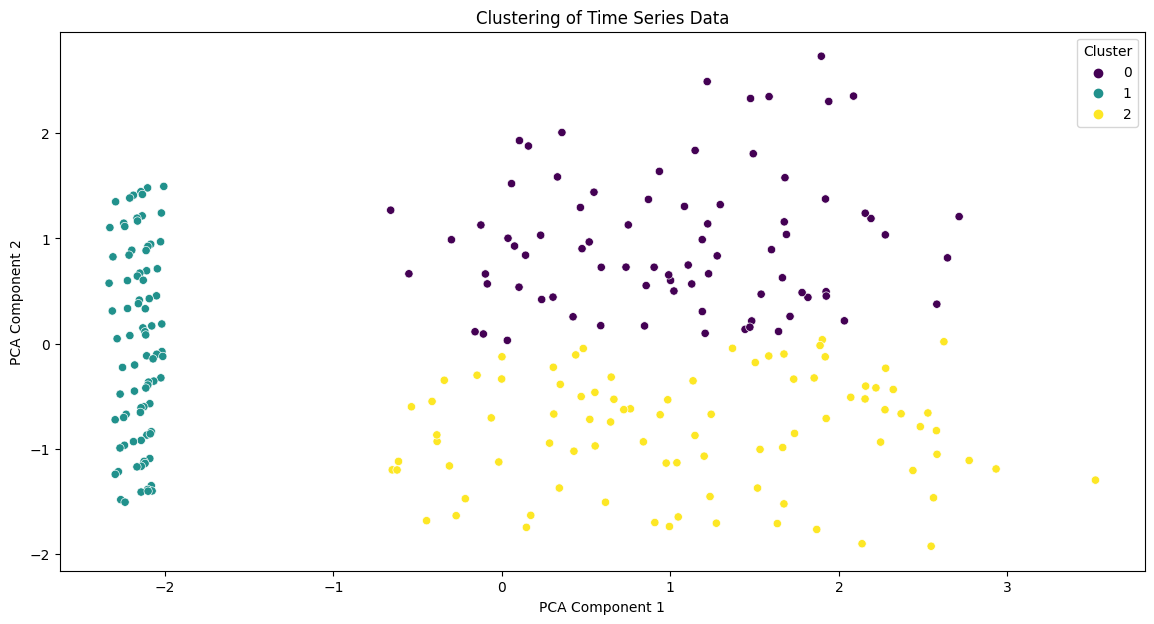

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

# Load the dataset
file_path = '/content/baggagecomplaints(time series).csv'
df = pd.read_csv(file_path)

# Assuming the dataset contains a time component and multiple features
# we will first standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=np.number))

# Then we'll reduce the dimensionality to 2D using PCA for visualization purposes
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Perform KMeans clustering with explicit n_init
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
df['cluster'] = kmeans.fit_predict(df_pca)

# Plot the clusters with corrected scatterplot call
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['cluster'], palette='viridis')
plt.title('Clustering of Time Series Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()



<ipython-input-15-96cbab722f77>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['DateTime'] = pd.to_datetime(cluster_df['Year'].astype(str) + '-' + cluster_df['Month'].astype(str))
<ipython-input-15-96cbab722f77>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['DateTime'] = pd.to_datetime(cluster_df['Year'].astype(str) + '-' + cluster_df['Month'].astype(str))
<ipython-input-15-96cbab722f77>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

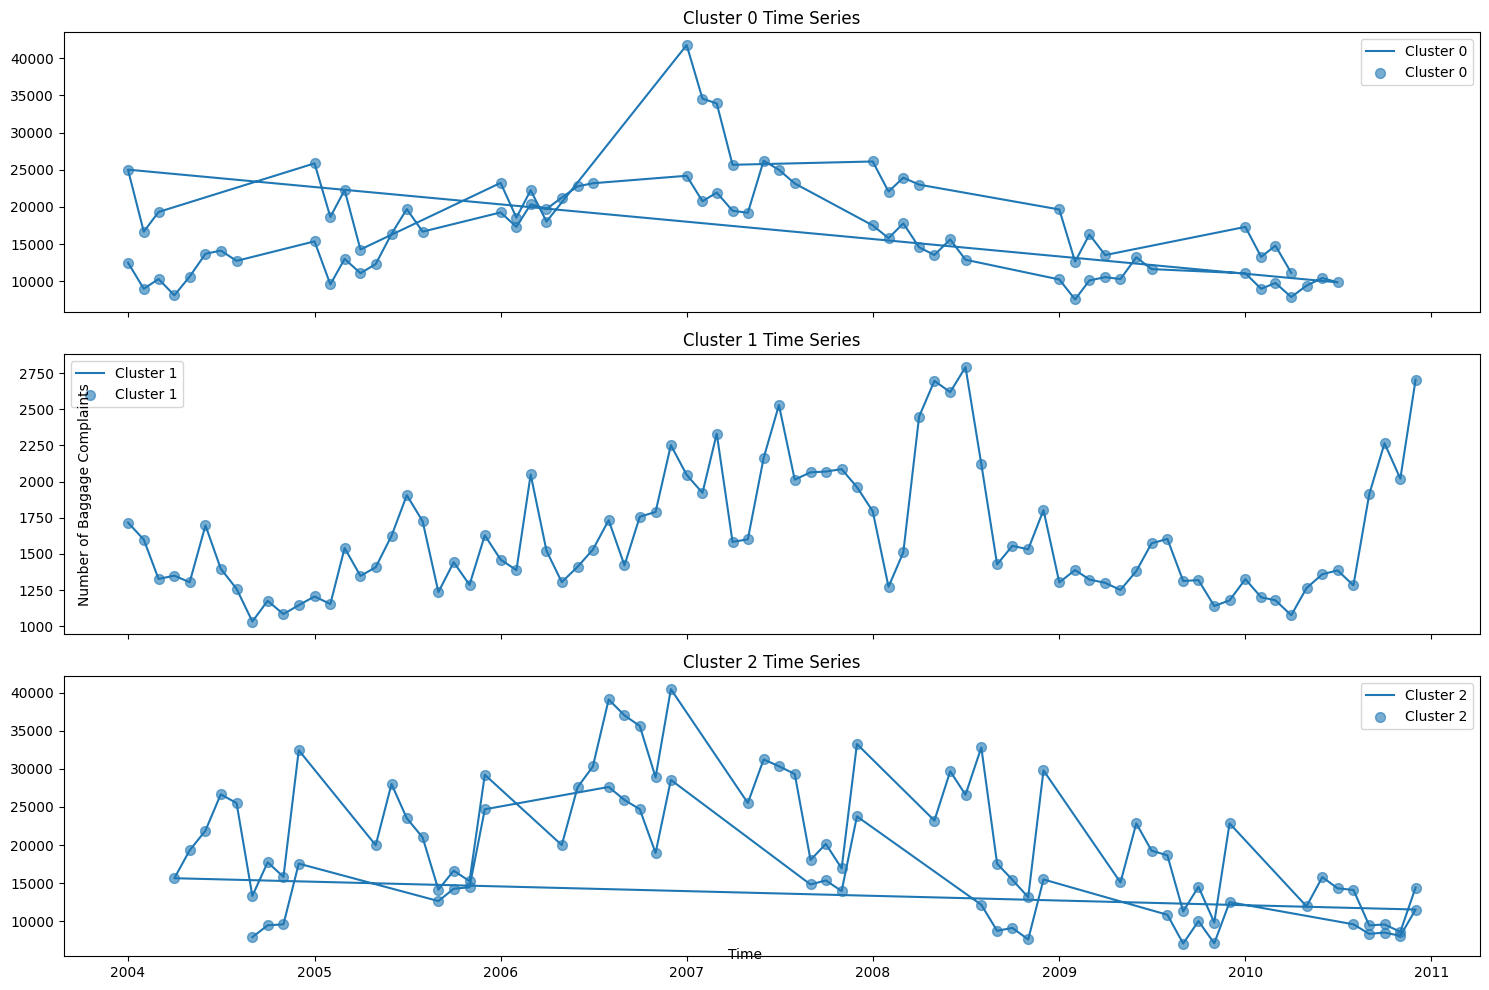

In [15]:
# We will use the original df dataframe before PCA and clustering, add the cluster labels to it, and then plot.
# First, let's add the cluster labels to the original dataframe.
df['cluster'] = kmeans.labels_

# Plotting each cluster
fig, axs = plt.subplots(n_clusters, figsize=(15, 10), sharex=True)

# We assume the data is already sorted by time and that the index corresponds to time.
for cluster in range(n_clusters):
    # Filter the dataframe for the current cluster
    cluster_df = df[df['cluster'] == cluster]

    # Assuming 'Month' and 'Year' columns exist, we create a datetime index for plotting
    cluster_df['DateTime'] = pd.to_datetime(cluster_df['Year'].astype(str) + '-' + cluster_df['Month'].astype(str))
    cluster_df = cluster_df.set_index('DateTime')

    # Plot each cluster in a subplot
    axs[cluster].plot(cluster_df.index, cluster_df['Baggage'], label=f'Cluster {cluster}')
    axs[cluster].scatter(cluster_df.index, cluster_df['Baggage'], s=50, label=f'Cluster {cluster}', alpha=0.6)
    axs[cluster].set_title(f'Cluster {cluster} Time Series')
    axs[cluster].legend()

# Set common labels
fig.text(0.5, 0.04, 'Time', ha='center', va='center')
fig.text(0.06, 0.5, 'Number of Baggage Complaints', ha='center', va='center', rotation='vertical')

plt.tight_layout()
plt.show()


## Explaining the above seen graph:

The first plot visualizes the clustering results after reducing the data to two principal components using PCA. The points are colored according to the cluster they belong to, as determined by the KMeans algorithm.

The second set of plots provides a time series view of the data, with each subplot representing one cluster. For each cluster, the number of baggage complaints over time is plotted. The scatter points on the plot may represent the individual data points for baggage complaints, and they are colored based on the cluster each point belongs to.

Please note the SettingWithCopyWarning warning, which is raised when trying to set on a copy of a DataFrame slice. This typically occurs when a slice of a DataFrame is modified directly without using .loc or .iloc. Although it's a warning and not an error, it's good practice to avoid this by using proper indexing methods to ensure that changes are made to the original DataFrame.